<a href="https://colab.research.google.com/github/wjunior15/iris_dataset/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Classificação de Flores usando Python
link dataset: [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/Iris)



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dados = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
dados.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
print(len(dados))
print(dados.shape)

150
(150, 5)


In [ ]:
dados['variety'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

In [ ]:
##Resumo Estatistico dos dados;
##Nem sempre são medidas relevantes e que fazem algum sentido para a análise
dados.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dados_Setosa = dados.query("variety == 'Setosa'")
dados_Virginica = dados.query("variety == 'Virginica'")
dados_Versicolor = dados.query("variety == 'Versicolor'")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##Análise da correlação dos dados de uma única planta
dados_Setosa.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,0.742547,0.267176,0.278098
sepal.width,0.742547,1.000000,0.177700,0.232752
petal.length,0.267176,0.177700,1.000000,0.331630
petal.width,0.278098,0.232752,0.331630,1.000000


O tamanho e largura das pétalas não apresenta correlação com nenhuma outra medida, inclusive entre as próprias medidas da pétala.
O tamanho da sépala apresenta uma leve correlação entre tamanho e largura (aprox. 0.74)

In [ ]:
dados_Versicolor.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,0.525911,0.754049,0.546461
sepal.width,0.525911,1.000000,0.560522,0.663999
petal.length,0.754049,0.560522,1.000000,0.786668
petal.width,0.546461,0.663999,0.786668,1.000000


In [ ]:
dados_Virginica.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,0.457228,0.864225,0.281108
sepal.width,0.457228,1.000000,0.401045,0.537728
petal.length,0.864225,0.401045,1.000000,0.322108
petal.width,0.281108,0.537728,0.322108,1.000000


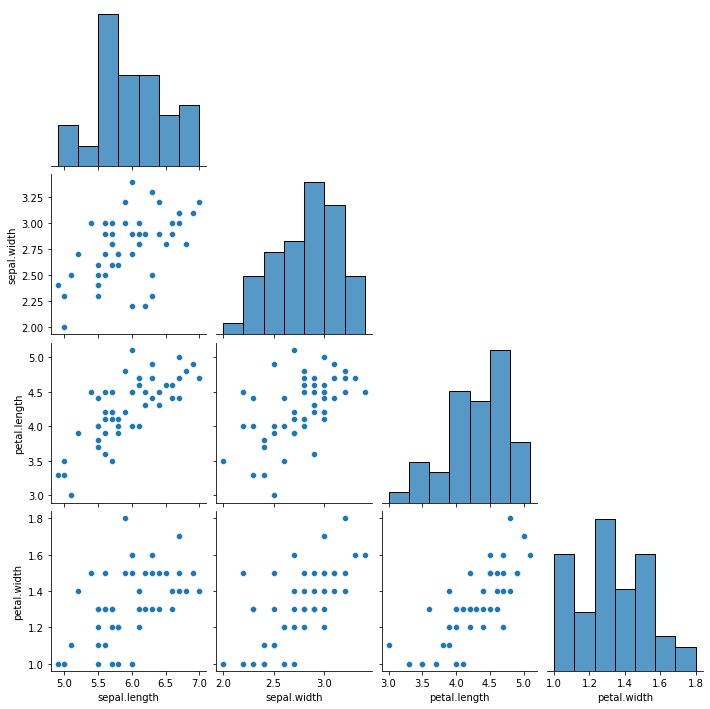

In [ ]:
sns.pairplot(dados_Versicolor, corner = True)

In [ ]:
##Divisão do dataframe entre rótulos e atributos
##usando .iloc do pandas

x = dados.iloc[:, :-1].values
y = dados.iloc[:, 4].values

In [ ]:
##Para dividir os conjuntos entre teste e treino importamos
from sklearn.model_selection import train_test_split

##Usaremos 80% dos dados para treino e 20% para teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.20)

###O método fit() calcula a média e o desvio padrão da distribuição para fazer a padronização dos dados.
###E método transform() aplica os cálculos para fazer a transformação nos dados.


In [ ]:
## Padronização dos dados
##Para deixar todos na mesma escala

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_treino)

x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

n_neighbors = 5 -> n_neighbors é o parametro para a classe, um valor para K

Pode ser ajustado de acordo com o programa já que não existe um valor ideal, mas é recomendavél iniciá-lo em 5


In [ ]:
##Treino e previsões do algoritmo

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors= 9)
classifier.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
##Fazendo as predições usando .predict
y_previsoes = classifier.predict(x_teste)

Para avaliar um algoritmo, a matriz de confusão, a precisão, o recall e a pontuação f1 são as métricas mais utilizadas.

###Calculo F1:
F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
##Avaliação do Algoritmo

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_teste, y_previsoes))
print(classification_report(y_teste, y_previsoes))

[[ 8  0  0]
 [ 0  9  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         8
  Versicolor       0.90      1.00      0.95         9
   Virginica       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

